# Comparing DT and RandomForest on BMI Data

## Imports

In [7]:
import numpy as np
import sklearn
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, LearningCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import matplotlib.pyplot as plt

# Data

Source: https://www.kaggle.com/datasets/sjagkoo7/bmi-body-mass-index?resource=download

In [8]:
data = pd.read_csv("./datasets/bmi_train.csv")
category_mapping = {'Male': 0, 'Female': 1}
data['Gender_Encoded'] = data['Gender'].map(category_mapping) # converts categorical data to numeric data.
X = data.drop(['Gender','Index'], axis=1)
y = data.drop(['Gender', 'Gender_Encoded', 'Height', 'Weight'], axis=1)
print("All X shape: ", X.shape)
print("All y shape: ", y.shape)

validation_data = pd.read_csv("./datasets/bmi_validation.csv")
print("Validation data shape: ", validation_data.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

All X shape:  (400, 3)
All y shape:  (400, 1)
Validation data shape:  (100, 3)
X_train shape:  (320, 3)
y_train shape:  (320, 1)
X_test shape:  (80, 3)
y_test shape:  (80, 1)


## Class Distribution

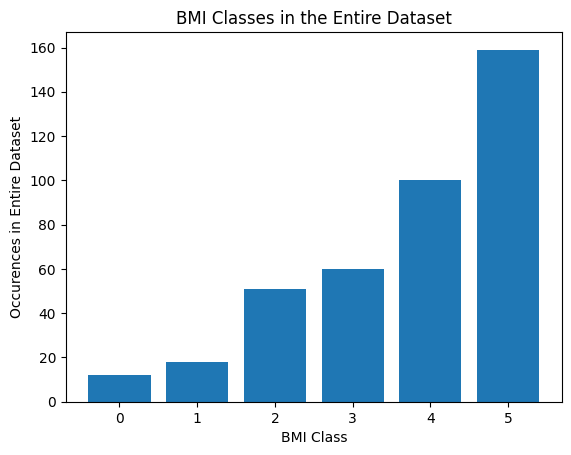

In [9]:
# Class imbalance, more obesity.
unique_values, counts = np.unique(y, return_counts=True)
plt.bar(unique_values, counts)
plt.title("BMI Classes in the Entire Dataset")
plt.xlabel("BMI Class")
plt.ylabel("Occurences in Entire Dataset")
plt.show()

## Feature Correlation

C:\Users\dwh71\AppData\Local\Temp\ipykernel_33884\1179218035.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


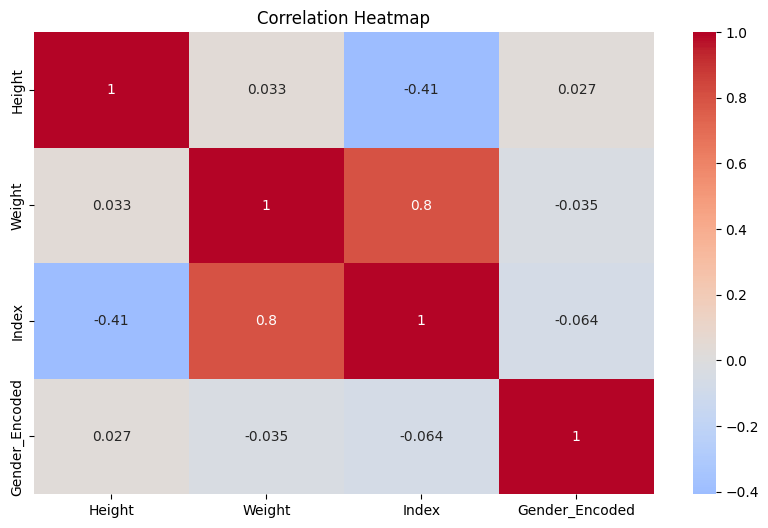

In [10]:

correlation_matrix = data.corr()

# Display a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Scatter Plot of Data

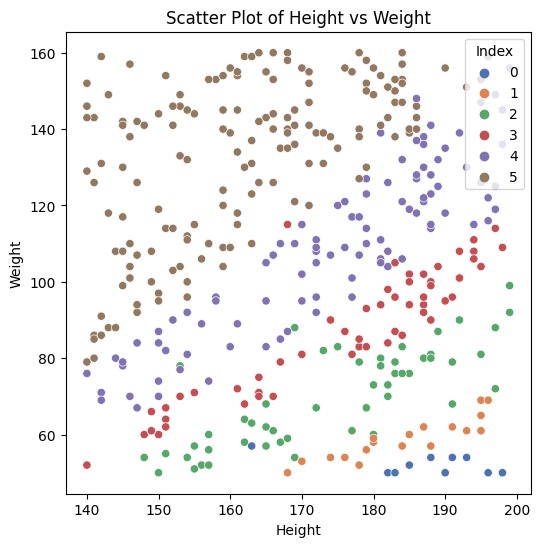

In [11]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=data, x='Height', y='Weight', hue='Index', palette='deep')
plt.title('Scatter Plot of Height vs Weight')
plt.show()

## Distribution of Features

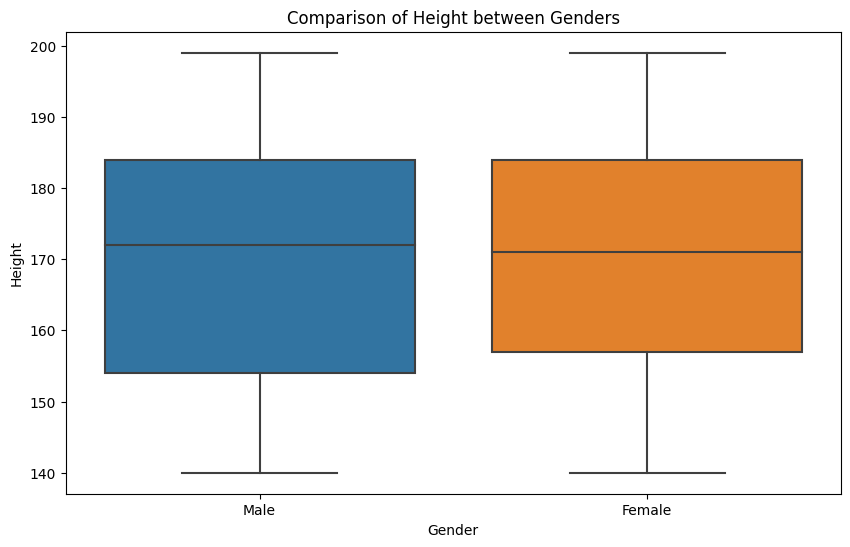

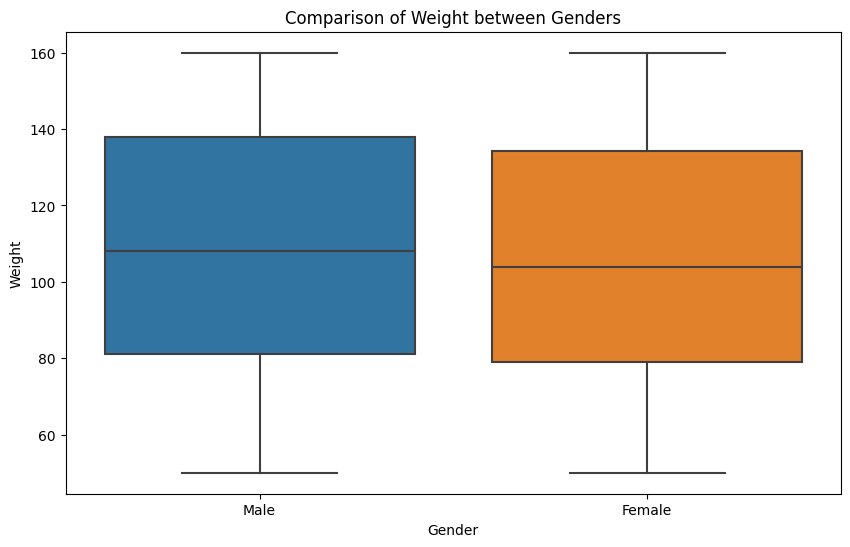

In [12]:
# Compare height and weight between male and female genders using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Gender', y='Height')
plt.title('Comparison of Height between Genders')
plt.xlabel('Gender')
plt.ylabel('Height')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Gender', y='Weight')
plt.title('Comparison of Weight between Genders')
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.show()

# Building the DT Model

## Hyperparameter Tuning DT

In [13]:
param_grid = {
    'max_depth': [i for i in range(2, 9)],
    'min_samples_leaf': [2 ** i for i in range(0, 4)],
    'criterion': ["entropy", "gini"]
}

dt = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(dt, param_grid, cv=StratifiedKFold(n_splits=3), scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters:", best_params_dt)
print("Best Score:", grid_search_dt.best_score_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1}
Best Score: 0.8281314289073061


## Decision Tree Classifier

In [14]:
dt = DecisionTreeClassifier(max_depth=best_params_dt["max_depth"], min_samples_leaf=best_params_dt["min_samples_leaf"], criterion=best_params_dt["criterion"])
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

## Decision Tree Visualization

[Text(0.5918141592920354, 0.9444444444444444, 'Weight <= 94.5\nentropy = 2.189\nsamples = 320\nvalue = [11, 17, 39, 47, 76, 130]\nclass = 5'),
 Text(0.3915929203539823, 0.8333333333333334, 'Weight <= 69.5\nentropy = 2.381\nsamples = 126\nvalue = [11, 17, 39, 31, 21, 7]\nclass = 2'),
 Text(0.23893805309734514, 0.7222222222222222, 'Height <= 167.5\nentropy = 2.037\nsamples = 56\nvalue = [11, 17, 18, 9, 1, 0]\nclass = 2'),
 Text(0.1415929203539823, 0.6111111111111112, 'Height <= 152.5\nentropy = 1.371\nsamples = 25\nvalue = [1, 0, 14, 9, 1, 0]\nclass = 2'),
 Text(0.07079646017699115, 0.5, 'Weight <= 57.5\nentropy = 1.189\nsamples = 12\nvalue = [0, 0, 3, 8, 1, 0]\nclass = 3'),
 Text(0.035398230088495575, 0.3888888888888889, 'Height <= 144.0\nentropy = 0.811\nsamples = 4\nvalue = [0, 0, 3, 1, 0, 0]\nclass = 2'),
 Text(0.017699115044247787, 0.2777777777777778, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]\nclass = 3'),
 Text(0.05309734513274336, 0.2777777777777778, 'entropy = 0.0\n

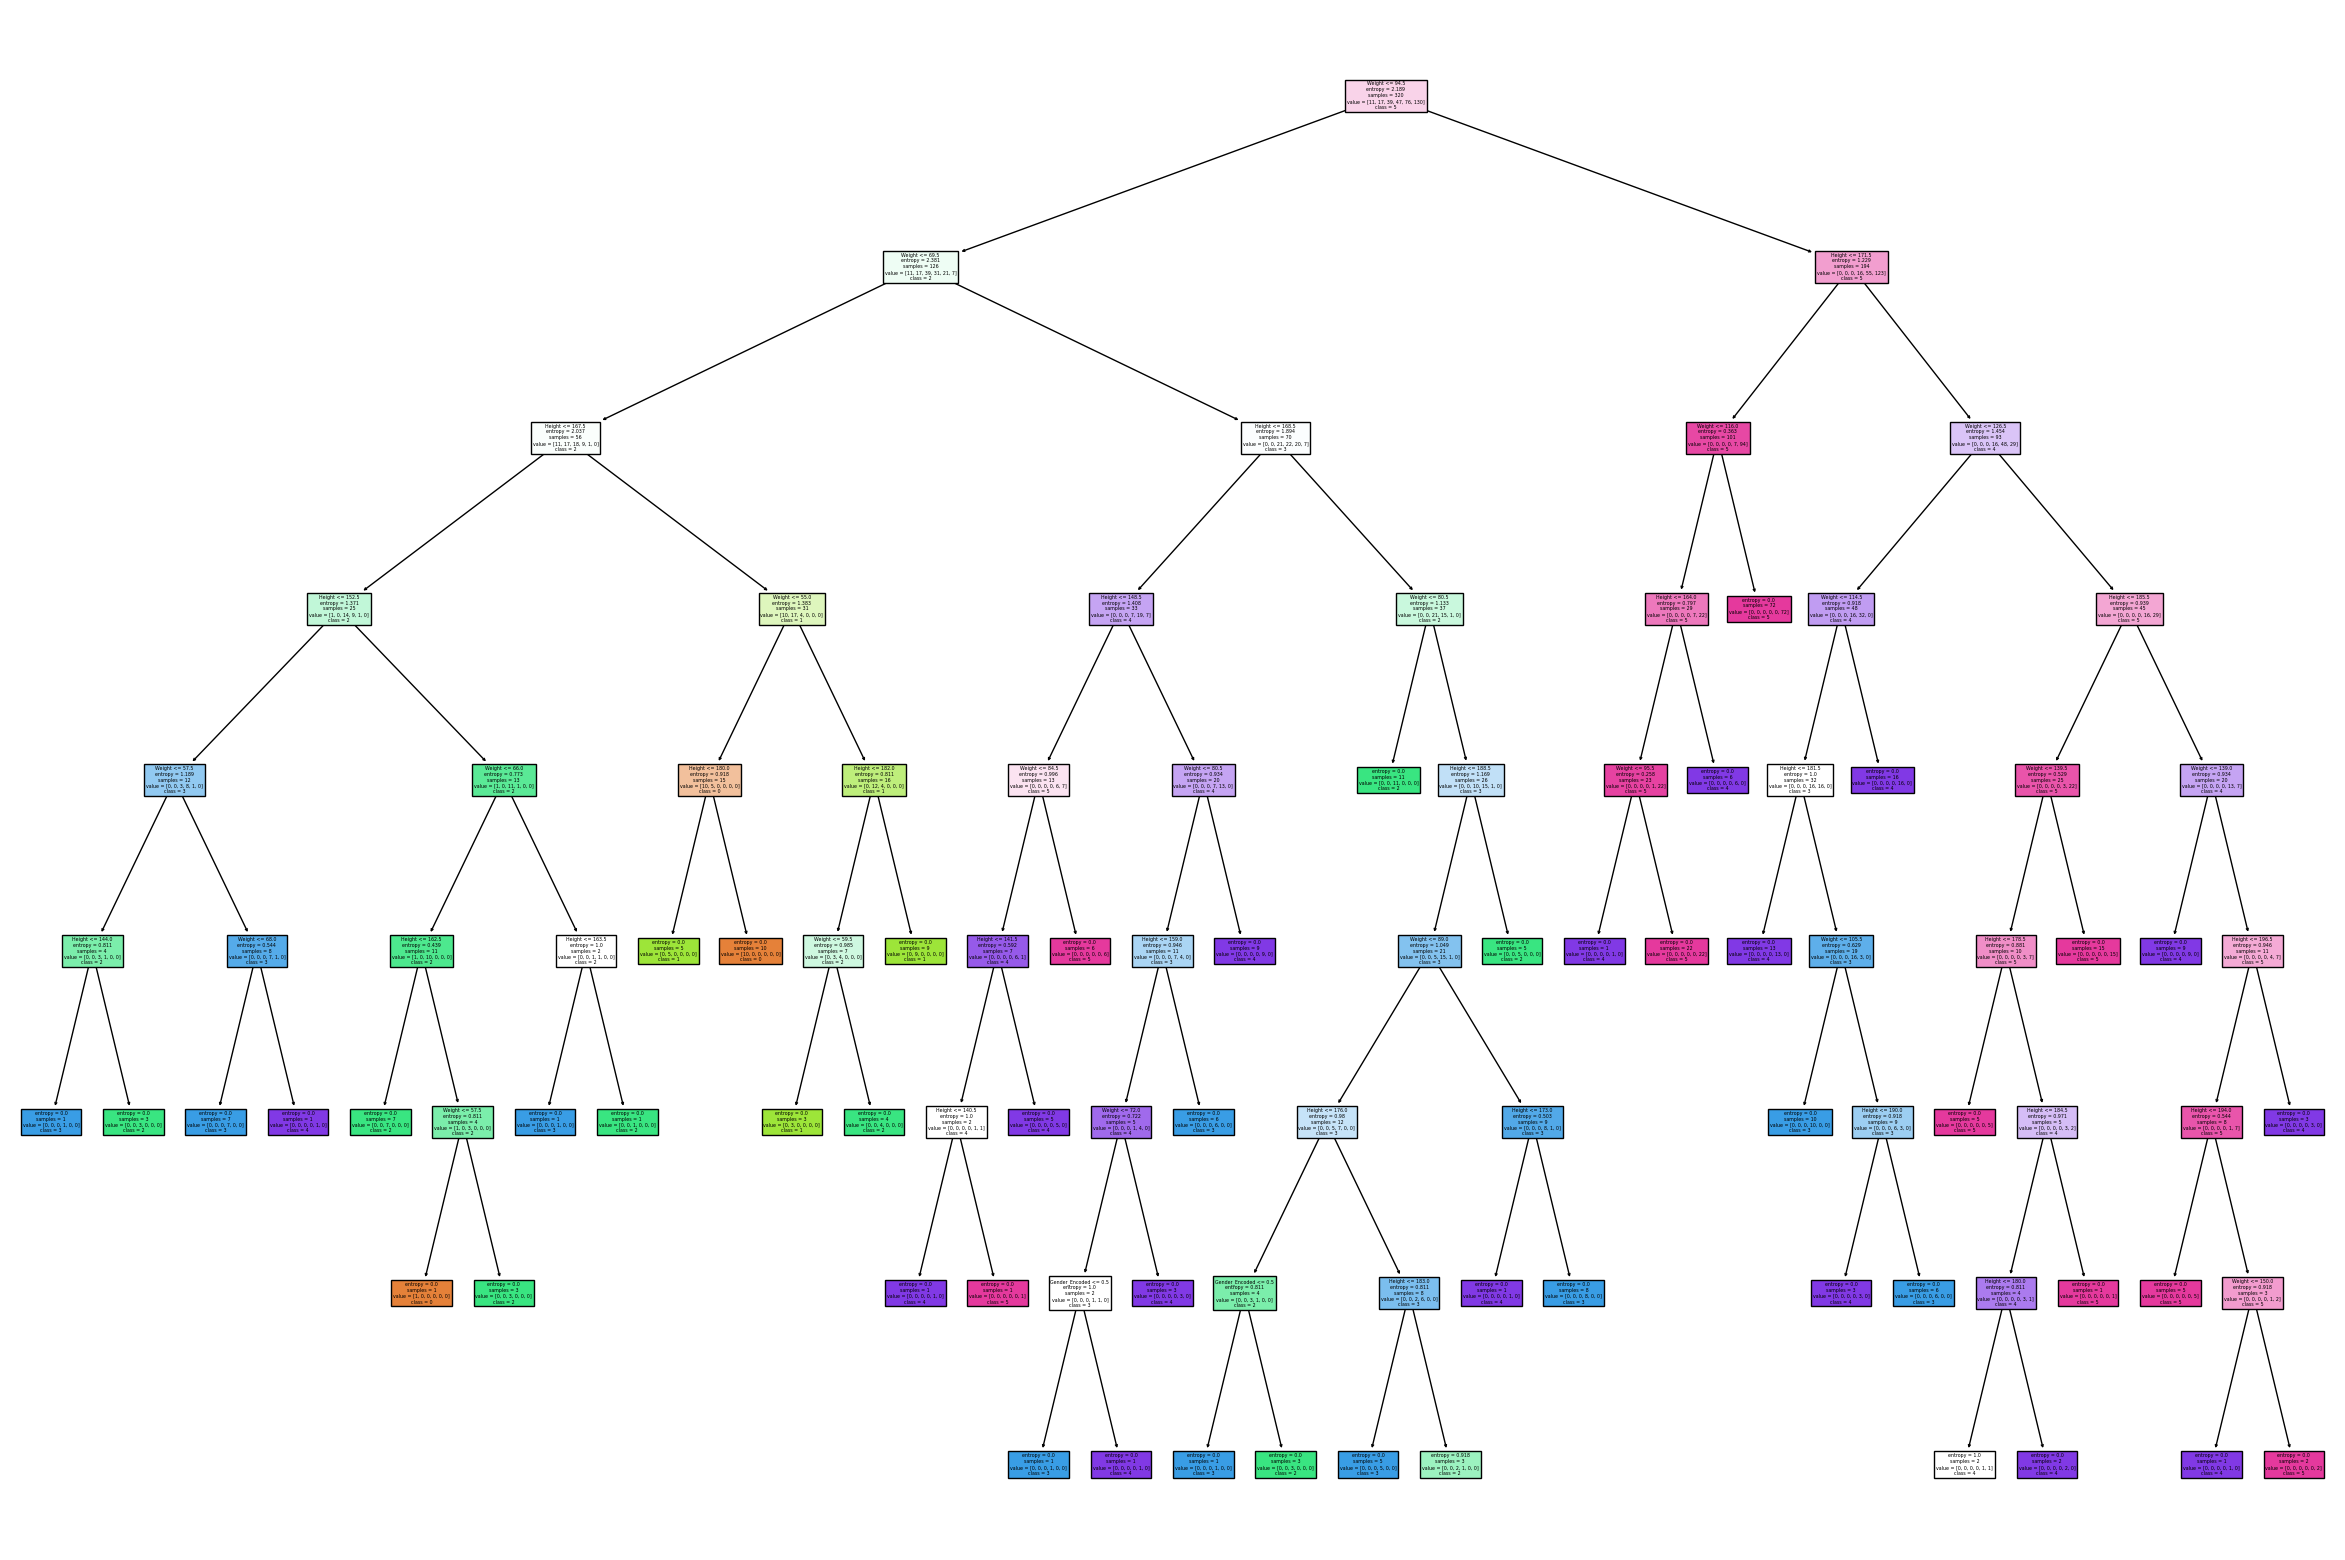

In [15]:
plt.figure(figsize=(30, 20))
plot_tree(dt, feature_names=X_train.columns.tolist(), class_names=['0', '1', '2','3','4','5'], filled=True)

## Accuracy Results on Test Data

In [16]:
print("Micro F1: ", sklearn.metrics.f1_score(y_test, y_pred, average='micro'))
print("Macro F1: ", sklearn.metrics.f1_score(y_test, y_pred, average='macro'))
print("Precision: ", sklearn.metrics.precision_score(y_test, y_pred, average="weighted"))
print("Recall: ", sklearn.metrics.recall_score(y_test, y_pred, average='weighted'))

# Calculate AUC-PRC for each class
auc_prc_scores = []
for class_index in range(y_pred.shape[0]):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test == class_index, y_pred == class_index)
    auc_prc_scores.append(sklearn.metrics.auc(recall, precision))

# Compute the summary metric (e.g., micro-average)
micro_avg_auc_prc = sklearn.metrics.auc(recall, precision)

print("AUC-PRC for Each Class:", auc_prc_scores)
print("Micro-Average AUC-PRC:", micro_avg_auc_prc)

Micro F1:  0.8000000000000002
Macro F1:  0.7033683460612853
Precision:  0.8400535714285715
Recall:  0.8
AUC-PRC for Each Class: [0.75, 0.625, 0.7875, 0.8284340659340659, 0.8070833333333334, 0.915301724137931, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Micro-Average AUC-PRC: 0.5


c:\Users\dwh71\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\dwh71\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\dwh71\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\dwh71\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\dwh71\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true

Text(0.5, 1.0, 'Model Predictions With 80.00% Accuracy')

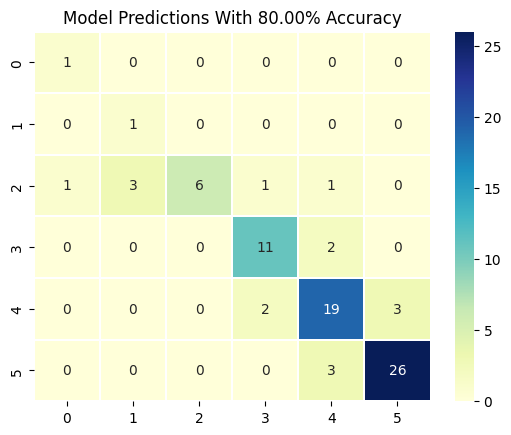

In [17]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(confusion_matrix, index=[f"{i}" for i in range(6)], columns=[f"{i}" for i in range(6)])
heatmap = sns.heatmap(conf_df, annot=True, fmt="d", linewidths=0.35, cmap="YlGnBu")
plt.title(f"Model Predictions With {(np.sum(confusion_matrix.diagonal()) / y_test.shape[0]) * 100:.2f}% Accuracy")

# RandomForestClassifier

## Hyperparamter Tuning

In [18]:
param_grid = {
    'max_depth': [i for i in range(2, 9)],
    'min_samples_leaf': [2 ** i for i in range(0, 4)],
    'criterion': ["entropy", "gini"]
}

rf = RandomForestClassifier(random_state=42)

print(y_train.shape)
grid_search_rf = GridSearchCV(rf, param_grid, cv=StratifiedKFold(n_splits=3), scoring='accuracy')
grid_search_rf.fit(X_train, y_train.values.ravel())
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)
print("Best Score:", grid_search_rf.best_score_)


(320, 1)
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1}
Best Score: 0.8125844942103098


## RandomForest Classifier

In [19]:
rf = RandomForestClassifier(n_estimators=300, 
                            max_depth=best_params_rf["max_depth"], 
                            min_samples_leaf=best_params_rf["min_samples_leaf"],
                            criterion=best_params_rf["criterion"])
rf.fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)

## Plotting the RandomForest Trees

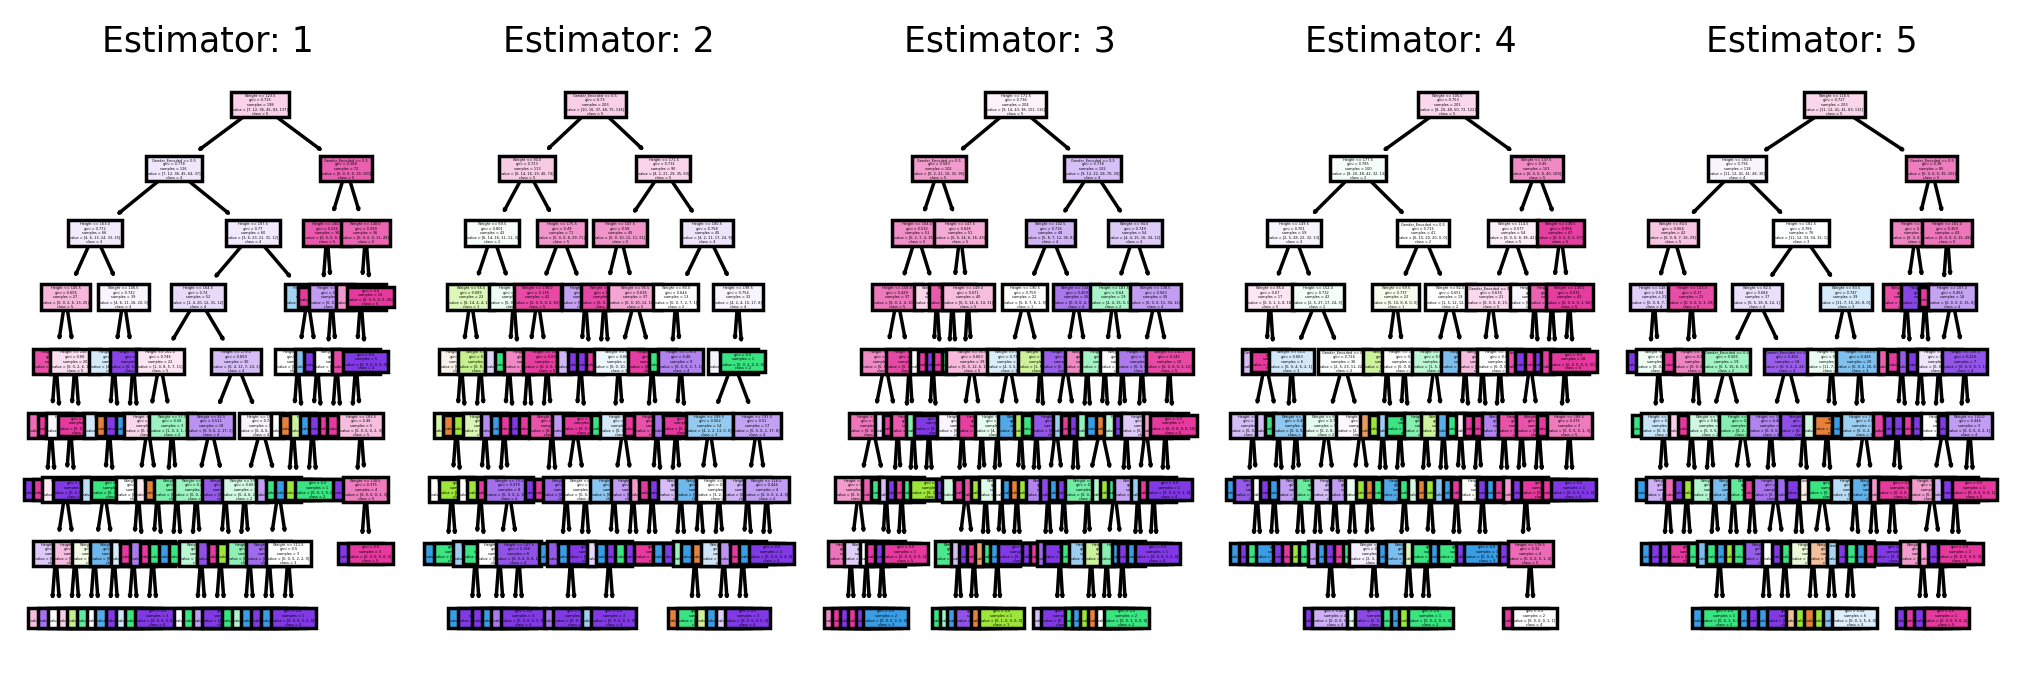

In [20]:
    fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,3), dpi=250)
    for index in range(5):
        tree.plot_tree(rf.estimators_[index],
                    feature_names = X_train.columns.tolist(), 
                    class_names= [f"{i}" for i in range(6)],
                    filled = True,
                    ax = axes[index])

        axes[index].set_title('Estimator: ' + str(index + 1), fontsize = 10)
#     fig.savefig(f'rf_{dt.n_estimators}trees.png')
    plt.show()

In [21]:
print("Micro F1: ", sklearn.metrics.f1_score(y_test, y_pred, average='micro'))
print("Macro F1: ", sklearn.metrics.f1_score(y_test, y_pred, average='macro'))

Micro F1:  0.8875
Macro F1:  0.8523938236704195


Text(0.5, 1.0, 'Model Predictions With 88.75% Accuracy')

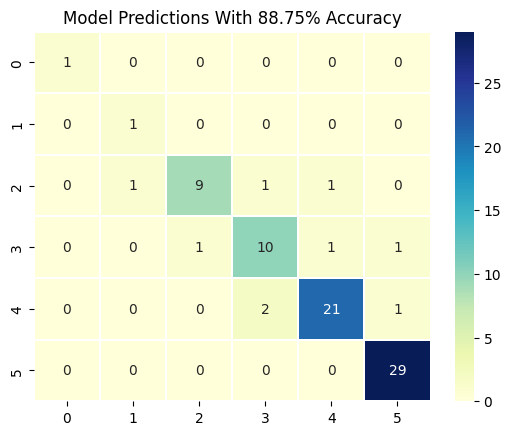

In [22]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(confusion_matrix, index=[f"{i}" for i in range(6)], columns=[f"{i}" for i in range(6)])
heatmap = sns.heatmap(conf_df, annot=True, fmt="d", linewidths=0.35, cmap="YlGnBu")
plt.title(f"Model Predictions With {(np.sum(confusion_matrix.diagonal()) / y_test.shape[0]) * 100:.2f}% Accuracy")

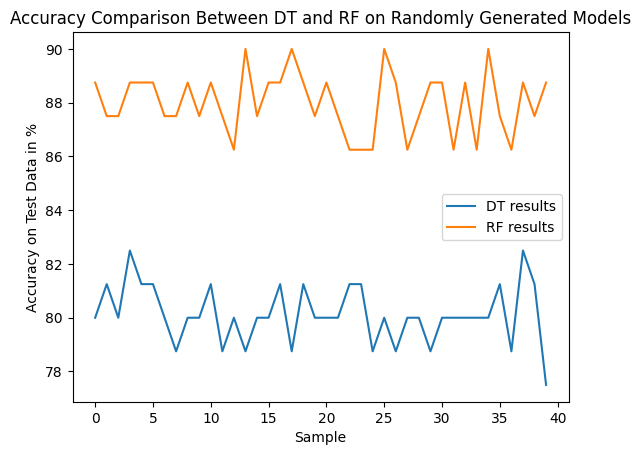

In [23]:
'''
Plot a graph that compares the two models, randomly generated with tuned hyperparameter models
'''
dt_results = []
rf_results = []
n_samples = 40
indexes = [i for i in range(n_samples)]
for i in indexes:
    dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    
    rf = RandomForestClassifier(n_estimators=325, max_depth=8)
    rf.fit(X_train, y_train.values.ravel())
    y_pred_rf = rf.predict(X_test)
    
    confusion_matrix_dt = sklearn.metrics.confusion_matrix(y_test, y_pred_dt)
    confusion_matrix_rf = sklearn.metrics.confusion_matrix(y_test, y_pred_rf)
    
    dt_results.append((np.sum(confusion_matrix_dt.diagonal()) / y_test.shape[0]) * 100)
    rf_results.append((np.sum(confusion_matrix_rf.diagonal()) / y_test.shape[0]) * 100)

plt.plot(indexes, dt_results, label="DT results")
plt.plot(indexes, rf_results, label="RF results")
plt.xlabel("Sample")
plt.ylabel("Accuracy on Test Data in %")
plt.title("Accuracy Comparison Between DT and RF on Randomly Generated Models")
plt.legend()
plt.show()



## Improvements

In [24]:
print(X_train.shape)
print(y_train.shape)

param_grid = {
    'max_depth': [i for i in range(2, 10)],
    'min_samples_leaf': [2 ** i for i in range(0, 4)],
    'criterion': ["entropy", "gini"]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search_rf.fit(X_train.drop(['Gender_Encoded'], axis=1), y_train.values.ravel())
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)
print("Best Score:", grid_search_rf.best_score_)

rf = RandomForestClassifier(n_estimators=300, 
                            max_depth=best_params_rf["max_depth"], 
                            min_samples_leaf=best_params_rf["min_samples_leaf"],
                            criterion=best_params_rf["criterion"])
rf.fit(X_train.drop(['Gender_Encoded'], axis=1), y_train.values.ravel())
y_pred = rf.predict(X_test.drop(['Gender_Encoded'], axis=1))

(320, 3)
(320, 1)
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1}
Best Score: 0.85625


Text(0.5, 1.0, 'Model Predictions With 90.00% Accuracy (NO GENDER)')

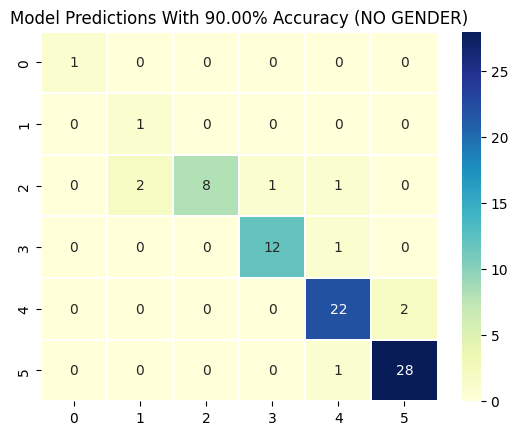

In [25]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(confusion_matrix, index=[f"{i}" for i in range(6)], columns=[f"{i}" for i in range(6)])
heatmap = sns.heatmap(conf_df, annot=True, fmt="d", linewidths=0.35, cmap="YlGnBu")
plt.title(f"Model Predictions With {(np.sum(confusion_matrix.diagonal()) / y_test.shape[0]) * 100:.2f}% Accuracy (NO GENDER)")

In [26]:
print("Micro F1: ", sklearn.metrics.f1_score(y_test, y_pred, average='micro'))
print("Macro F1: ", sklearn.metrics.f1_score(y_test, y_pred, average='macro'))

Micro F1:  0.9
Macro F1:  0.8450314415205457


## Learning Curve

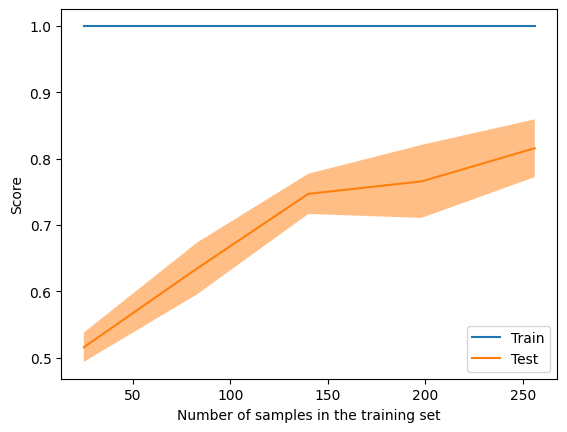

In [29]:

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train.values.ravel(), cv=StratifiedKFold(n_splits=5))
display = LearningCurveDisplay(train_sizes=train_sizes,
    train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()